<a href="https://colab.research.google.com/gist/sameerprasadkoppolu/d0300cfd0a682ae0c00319f49d85c952/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded['nba_elo_latest.csv']))

Saving nba_elo_latest.csv to nba_elo_latest.csv


# **FOR ELO RATING**

In [2]:
df['game_id']=range(1,len(df)+1) #Create a new column for Game IDs

In [3]:
df=df[['game_id','home','away','elo1_pre_home','elo2_pre_away','home_score','away_score']]
df

,game_id,home,away,elo1_pre_home,elo2_pre_away,home_score,away_score
0,1,MIL,BRK,1657.749890,1605.053732,127,104
1,2,LAL,GSW,1549.258851,1529.010908,114,121
2,3,CHO,IND,1438.333792,1487.419833,123,122
3,4,DET,CHI,1380.825861,1495.430593,88,94
4,5,NYK,BOS,1547.753492,1499.792561,138,134
...,...,...,...,...,...,...,...
1318,1319,GSW,BOS,1657.437247,1763.576161,107,88
1319,1320,BOS,GSW,1747.409480,1673.603928,116,100
1320,1321,BOS,GSW,1754.045814,1666.967594,97,107
1321,1322,GSW,BOS,1685.173727,1735.839681,104,94


In [4]:
import numpy as np
df['win']=np.where(df['home_score']>df['away_score'],1,0) #Create a new column for game result
df['diff']=np.where((df['home_score']-df['away_score'])<0,-1*(df['home_score']-df['away_score']),df['home_score']-df['away_score']) #Create a new column for modulus of the difference between the scores
df['d']=np.where(df['win']==1,df['elo1_pre_home']-df['elo2_pre_away']+100,df['elo2_pre_away']-df['elo1_pre_home']-100) #Create a new column to find the difference between the ELO Ratings of the 2 teams inclusive of the home team advantage
df['mov']=(df['diff']+3)**0.8/(7.5+(0.006*df['d'])) #Create a new column for the Margin of Victory
df['K']=df['mov']*20 #Created a new column for the adjusted K factor that includes the Margin of Victory
df

,game_id,home,away,elo1_pre_home,elo2_pre_away,home_score,away_score,win,diff,d,mov,K
0,1,MIL,BRK,1657.749890,1605.053732,127,104,1,23,152.696158,1.610141,32.202813
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0,7,-120.247943,0.930820,18.616396
2,3,CHO,IND,1438.333792,1487.419833,123,122,1,1,50.913959,0.388372,7.767445
3,4,DET,CHI,1380.825861,1495.430593,88,94,0,6,14.604732,0.764342,15.286848
4,5,NYK,BOS,1547.753492,1499.792561,138,134,1,4,147.960931,0.565499,11.309988
...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,GSW,BOS,1657.437247,1763.576161,107,88,1,19,-6.138914,1.588602,31.772033
1319,1320,BOS,GSW,1747.409480,1673.603928,116,100,1,16,173.805552,1.234244,24.684876
1320,1321,BOS,GSW,1754.045814,1666.967594,97,107,0,10,-187.078220,1.220400,24.407996
1321,1322,GSW,BOS,1685.173727,1735.839681,104,94,1,10,49.334046,0.998350,19.966990


In [5]:
df['elo_prob_home']=1/(1+10**((df['elo2_pre_away']-df['elo1_pre_home']-100)/400)) #Win Probability for the Home Team.
df['elo_prob_away']=1-df['elo_prob_home'] #Win Probability for the Away Team
df

,game_id,home,away,elo1_pre_home,elo2_pre_away,home_score,away_score,win,diff,d,mov,K,elo_prob_home,elo_prob_away
0,1,MIL,BRK,1657.749890,1605.053732,127,104,1,23,152.696158,1.610141,32.202813,0.706613,0.293387
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0,7,-120.247943,0.930820,18.616396,0.666457,0.333543
2,3,CHO,IND,1438.333792,1487.419833,123,122,1,1,50.913959,0.388372,7.767445,0.572751,0.427249
3,4,DET,CHI,1380.825861,1495.430593,88,94,0,6,14.604732,0.764342,15.286848,0.478994,0.521006
4,5,NYK,BOS,1547.753492,1499.792561,138,134,1,4,147.960931,0.565499,11.309988,0.700930,0.299070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,GSW,BOS,1657.437247,1763.576161,107,88,1,19,-6.138914,1.588602,31.772033,0.491166,0.508834
1319,1320,BOS,GSW,1747.409480,1673.603928,116,100,1,16,173.805552,1.234244,24.684876,0.731158,0.268842
1320,1321,BOS,GSW,1754.045814,1666.967594,97,107,0,10,-187.078220,1.220400,24.407996,0.745909,0.254091
1321,1322,GSW,BOS,1685.173727,1735.839681,104,94,1,10,49.334046,0.998350,19.966990,0.570524,0.429476


In [6]:
df['elo1_post_home']=np.where(df['win']==1,df['elo1_pre_home']+df['K']*(1-df['elo_prob_home']),df['elo1_pre_home']+df['K']*(0-df['elo_prob_home'])) #Find New ELO Rating for Home Team based on Game Result
df['elo2_post_away']=np.where(df['win']==0,df['elo2_pre_away']+df['K']*(1-df['elo_prob_away']),df['elo2_pre_away']+df['K']*(0-df['elo_prob_away'])) #Find New ELO Rating for Away Team based on Game Result
df

,game_id,home,away,elo1_pre_home,elo2_pre_away,home_score,away_score,win,diff,d,mov,K,elo_prob_home,elo_prob_away,elo1_post_home,elo2_post_away
0,1,MIL,BRK,1657.749890,1605.053732,127,104,1,23,152.696158,1.610141,32.202813,0.706613,0.293387,1667.197782,1595.605840
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0,7,-120.247943,0.930820,18.616396,0.666457,0.333543,1536.851828,1541.417931
2,3,CHO,IND,1438.333792,1487.419833,123,122,1,1,50.913959,0.388372,7.767445,0.572751,0.427249,1441.652425,1484.101200
3,4,DET,CHI,1380.825861,1495.430593,88,94,0,6,14.604732,0.764342,15.286848,0.478994,0.521006,1373.503545,1502.752909
4,5,NYK,BOS,1547.753492,1499.792561,138,134,1,4,147.960931,0.565499,11.309988,0.700930,0.299070,1551.135967,1496.410086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,GSW,BOS,1657.437247,1763.576161,107,88,1,19,-6.138914,1.588602,31.772033,0.491166,0.508834,1673.603928,1747.409480
1319,1320,BOS,GSW,1747.409480,1673.603928,116,100,1,16,173.805552,1.234244,24.684876,0.731158,0.268842,1754.045814,1666.967594
1320,1321,BOS,GSW,1754.045814,1666.967594,97,107,0,10,-187.078220,1.220400,24.407996,0.745909,0.254091,1735.839681,1685.173727
1321,1322,GSW,BOS,1685.173727,1735.839681,104,94,1,10,49.334046,0.998350,19.966990,0.570524,0.429476,1693.749069,1727.264339


In [7]:
df=df[['game_id','home','away','elo1_pre_home','elo2_pre_away','home_score','away_score','elo_prob_home','elo_prob_away','elo1_post_home','elo2_post_away']]
#Find Home Games
home=df.groupby(['game_id','home','away','elo1_pre_home','elo2_pre_away','home_score','away_score','elo_prob_home','elo_prob_away','elo1_post_home','elo2_post_away']).sum().reset_index()
home.rename(columns={'home':'team','away':'opp','elo1_pre_home':'elo_pre_team','elo2_pre_away':'elo_pre_opp','elo_prob_home':'elo_prob_team','elo_prob_away':'elo_prob_opp','elo1_post_home':'elo_post_team','elo2_post_away':'elo_post_opp','home_score':'pts_for','away_score':'pts_agn'},inplace=True)
home['win']=np.where(home['pts_for']>home['pts_agn'],1,0) #Flag Variable for Game Result. 1 for Win and 0 for Loss
home['home']=1 #Flag Variable to identify that the team in question is playing at home
home

,game_id,team,opp,elo_pre_team,elo_pre_opp,pts_for,pts_agn,elo_prob_team,elo_prob_opp,elo_post_team,elo_post_opp,win,home
0,1,MIL,BRK,1657.749890,1605.053732,127,104,0.706613,0.293387,1667.197782,1595.605840,1,1
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0.666457,0.333543,1536.851828,1541.417931,0,1
2,3,CHO,IND,1438.333792,1487.419833,123,122,0.572751,0.427249,1441.652425,1484.101200,1,1
3,4,DET,CHI,1380.825861,1495.430593,88,94,0.478994,0.521006,1373.503545,1502.752909,0,1
4,5,NYK,BOS,1547.753492,1499.792561,138,134,0.700930,0.299070,1551.135967,1496.410086,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,GSW,BOS,1657.437247,1763.576161,107,88,0.491166,0.508834,1673.603928,1747.409480,1,1
1319,1320,BOS,GSW,1747.409480,1673.603928,116,100,0.731158,0.268842,1754.045814,1666.967594,1,1
1320,1321,BOS,GSW,1754.045814,1666.967594,97,107,0.745909,0.254091,1735.839681,1685.173727,0,1
1321,1322,GSW,BOS,1685.173727,1735.839681,104,94,0.570524,0.429476,1693.749069,1727.264339,1,1


In [8]:
#Find Away Games
away=df.groupby(['game_id','home','away','elo1_pre_home','elo2_pre_away','home_score','away_score','elo_prob_home','elo_prob_away','elo1_post_home','elo2_post_away']).sum().reset_index()
away.rename(columns={'home':'opp','away':'team','elo1_pre_home':'elo_pre_opp','elo2_pre_away':'elo_pre_team','elo_prob_home':'elo_prob_opp','elo_prob_away':'elo_prob_team','elo1_post_home':'elo_post_opp','elo2_post_away':'elo_post_team','home_score':'pts_agn','away_score':'pts_for'},inplace=True)
away['win']=np.where(away['pts_for']>away['pts_agn'],1,0) #Flag Variable for Game Result. 1 for Win and 0 for Loss
away['home']=0 #Flag Variable to identify that the team in question is playing away
away

,game_id,opp,team,elo_pre_opp,elo_pre_team,pts_agn,pts_for,elo_prob_opp,elo_prob_team,elo_post_opp,elo_post_team,win,home
0,1,MIL,BRK,1657.749890,1605.053732,127,104,0.706613,0.293387,1667.197782,1595.605840,0,0
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0.666457,0.333543,1536.851828,1541.417931,1,0
2,3,CHO,IND,1438.333792,1487.419833,123,122,0.572751,0.427249,1441.652425,1484.101200,0,0
3,4,DET,CHI,1380.825861,1495.430593,88,94,0.478994,0.521006,1373.503545,1502.752909,1,0
4,5,NYK,BOS,1547.753492,1499.792561,138,134,0.700930,0.299070,1551.135967,1496.410086,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1319,GSW,BOS,1657.437247,1763.576161,107,88,0.491166,0.508834,1673.603928,1747.409480,0,0
1319,1320,BOS,GSW,1747.409480,1673.603928,116,100,0.731158,0.268842,1754.045814,1666.967594,0,0
1320,1321,BOS,GSW,1754.045814,1666.967594,97,107,0.745909,0.254091,1735.839681,1685.173727,1,0
1321,1322,GSW,BOS,1685.173727,1735.839681,104,94,0.570524,0.429476,1693.749069,1727.264339,0,0


In [9]:
final=pd.concat([home,away]).reset_index() #Concatenate the Home and Away Data Frames
final.drop(['index'],axis=1,inplace=True)
final

,game_id,team,opp,elo_pre_team,elo_pre_opp,pts_for,pts_agn,elo_prob_team,elo_prob_opp,elo_post_team,elo_post_opp,win,home
0,1,MIL,BRK,1657.749890,1605.053732,127,104,0.706613,0.293387,1667.197782,1595.605840,1,1
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0.666457,0.333543,1536.851828,1541.417931,0,1
2,3,CHO,IND,1438.333792,1487.419833,123,122,0.572751,0.427249,1441.652425,1484.101200,1,1
3,4,DET,CHI,1380.825861,1495.430593,88,94,0.478994,0.521006,1373.503545,1502.752909,0,1
4,5,NYK,BOS,1547.753492,1499.792561,138,134,0.700930,0.299070,1551.135967,1496.410086,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,1319,BOS,GSW,1763.576161,1657.437247,88,107,0.508834,0.491166,1747.409480,1673.603928,0,0
2642,1320,GSW,BOS,1673.603928,1747.409480,100,116,0.268842,0.731158,1666.967594,1754.045814,0,0
2643,1321,GSW,BOS,1666.967594,1754.045814,107,97,0.254091,0.745909,1685.173727,1735.839681,1,0
2644,1322,BOS,GSW,1735.839681,1685.173727,94,104,0.429476,0.570524,1727.264339,1693.749069,0,0


In [10]:
final['elo_win']=np.where(final['elo_prob_team']>final['elo_prob_opp'],1,0) #A Game Result is a Win if the Probability of a Team winning the game is greater than that of the Opposition.

[Text(0, 0.5, 'True Results'), Text(0.5, 0, 'Predicted Results')]

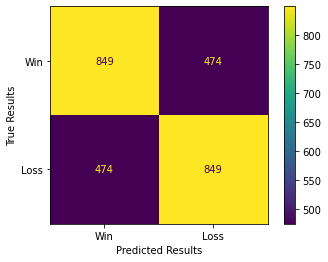

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(final['win'],final['elo_win'])
cmd = ConfusionMatrixDisplay(cm, display_labels=['Win','Loss'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted Results', ylabel='True Results')

***Variation ELO Rating of the Golden State Warriors over the course of the 2021-22 season***

In [12]:
gsw=final.loc[final['team']=='GSW'].sort_values(by=['game_id'],ascending=['True']) #Identify only Golden State Warriors Matches and sort them in ascending order of game id
gsw_elo=[1529.010908] #Create a list of ELO Ratings and initalize the list with GSW's ELO Rating prior to the start of the first game
l=list(gsw['elo_post_team']) #Convert the ELO Ratings of GSW at the end of every game into a list named l
for i in l:
  gsw_elo.append(i) #Append the ELO Ratings at the end of every game to the gsw_elo list

gsw_elo_roundedup=[round(num) for num in gsw_elo] #Round off the values in this list to the nearest whole number

gsw_dict={'gsw_game_id':list(range(0,len(gsw_elo))) , 'ELO_Rating':gsw_elo_roundedup} #Create a Dictionary with 2 keys. The first key holds a new set of game ids starting from zero to indicate ascending order of only GSW's games
#The second key contains the ELO Ratings of GSW for the corresponding gameids
gsw_dict

gsw_df=pd.DataFrame(data=gsw_dict) #Convert Dictionary to a Data Frame
gsw_df

,gsw_game_id,ELO_Rating
0,0,1529
1,1,1541
2,2,1546
3,3,1558
4,4,1562
...,...,...
100,100,1674
101,101,1667
102,102,1685
103,103,1694


In [13]:
#Graph Out the Variation of GSW's ELO Rating
#Consider the ELO Rating at Game ID 0 to be GSW's initial ELO rating at the beginning of the season prior to playing any game
import plotly.express as px


fig = px.line(gsw_df, x="gsw_game_id", y="ELO_Rating",markers=True)
fig.update_traces(textposition="bottom right")
fig.update_layout(title='Variation of ELO Rating of the Golden State Warriors over the Course of the Season',
                   xaxis_title='Games',
                   yaxis_title='ELO Rating')
fig.show()

# **FOR PYTHAGOREAN EXPECTATION**

***Analysis of Pythagorean Expectation and Win Percentage***

In [16]:
reg=final.loc[final['game_id']<=1230] #Regular Season is Up to Game ID 1230
reg=final.loc[final['game_id']<=1230]
reg['gc']=1
reg_games=reg.groupby('team')['pts_for','pts_agn','gc','win'].sum()
reg_games['pyth']=reg_games['pts_for']**2/(reg_games['pts_for']**2 + reg_games['pts_agn']**2)
reg_games['wpc']=reg_games['win']/reg_games['gc']
reg_games

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,pts_for,pts_agn,gc,win,pyth,wpc
team,,,,,,
ATL,9343,9215,82,43,0.506897,0.524390
BOS,9164,8567,82,51,0.533632,0.621951
BRK,9258,9194,82,44,0.503468,0.536585
CHI,9152,9184,82,46,0.498255,0.560976
CHO,9457,9421,82,43,0.501907,0.524390
CLE,8839,8665,82,44,0.509940,0.536585
DAL,8858,8587,82,52,0.515531,0.634146
DEN,9243,9054,82,48,0.510328,0.585366
DET,8596,9229,82,23,0.464533,0.280488


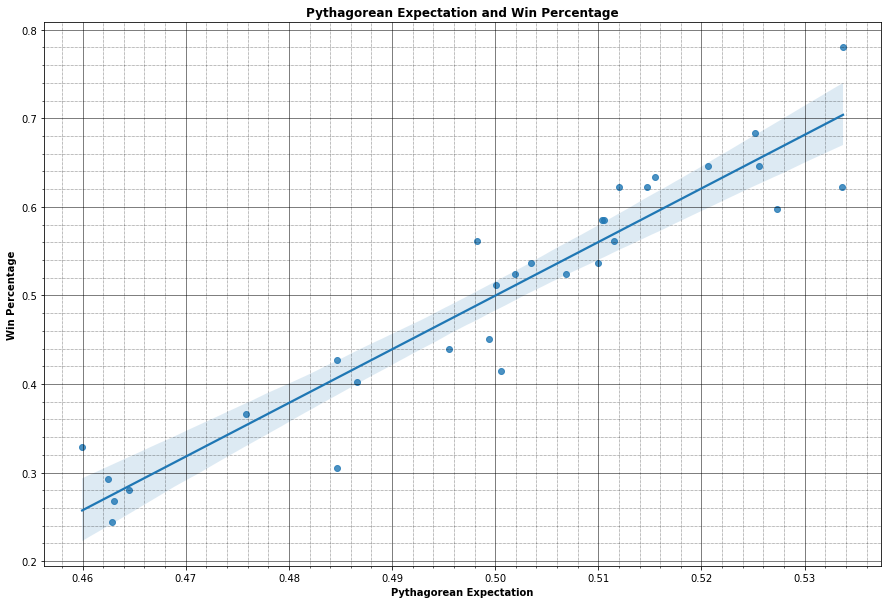

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax=sns.regplot(x='pyth',y='wpc',data=reg_games)
plt.grid(which='major', linestyle='-', linewidth='0.5',color='black')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.xlabel('Pythagorean Expectation',fontweight='bold')
plt.ylabel('Win Percentage',fontweight='bold')
plt.title('Pythagorean Expectation and Win Percentage',fontweight='bold')
plt.show()

In [18]:
reg_games['pyth'].corr(reg_games['wpc']) #Correlation Coefficient Between Pythagorean Expectation and Win Percentage

0.9465155548816669

***Using Pythagorean Expectation and Home Team Advantage to Predict Game Result***

In [19]:
final['cumPTSF']=final.groupby('team')['pts_for'].apply(lambda x: x.cumsum()) #Cumulative Points scored by each team over each game
final['cumPTSA']=final.groupby('team')['pts_agn'].apply(lambda x: x.cumsum()) #Cumulative Points scored against each team over each game
final['pyth']=final['cumPTSF']**2/((final['cumPTSF']**2)+(final['cumPTSA']**2)) #Cumulative Pythagorean Expectation over each game
final

,game_id,team,opp,elo_pre_team,elo_pre_opp,pts_for,pts_agn,elo_prob_team,elo_prob_opp,elo_post_team,elo_post_opp,win,home,elo_win,cumPTSF,cumPTSA,pyth
0,1,MIL,BRK,1657.749890,1605.053732,127,104,0.706613,0.293387,1667.197782,1595.605840,1,1,1,127,104,0.598590
1,2,LAL,GSW,1549.258851,1529.010908,114,121,0.666457,0.333543,1536.851828,1541.417931,0,1,1,114,121,0.470239
2,3,CHO,IND,1438.333792,1487.419833,123,122,0.572751,0.427249,1441.652425,1484.101200,1,1,1,123,122,0.504082
3,4,DET,CHI,1380.825861,1495.430593,88,94,0.478994,0.521006,1373.503545,1502.752909,0,1,0,88,94,0.467069
4,5,NYK,BOS,1547.753492,1499.792561,138,134,0.700930,0.299070,1551.135967,1496.410086,1,1,1,138,134,0.514703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,1319,BOS,GSW,1763.576161,1657.437247,88,107,0.508834,0.491166,1747.409480,1673.603928,0,0,1,11603,10910,0.530753
2642,1320,GSW,BOS,1673.603928,1747.409480,100,116,0.268842,0.731158,1666.967594,1754.045814,0,0,0,11353,10811,0.524439
2643,1321,GSW,BOS,1666.967594,1754.045814,107,97,0.254091,0.745909,1685.173727,1735.839681,1,0,0,11460,10908,0.524663
2644,1322,BOS,GSW,1735.839681,1685.173727,94,104,0.429476,0.570524,1727.264339,1693.749069,0,0,0,11697,11014,0.530046


In [20]:
#Employing the Logit Model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
reg=smf.glm(formula='win ~ pyth+home', data=final, family=sm.families.Binomial()).fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    win   No. Observations:                 2646
Model:                            GLM   Df Residuals:                     2643
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1681.3
Date:                Fri, 12 Aug 2022   Deviance:                       3362.7
Time:                        18:14:40   Pearson chi2:                 2.63e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.6518      0.950    -15.425      0.000     -16.514     -12.790
pyth          28.6575      1.876     15.280      0.000      24.982      32.333
home           0.2590      0.083      3.136      0.002       0.097       0.421
==============================================================================
"""

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
fp=reg.predict() #Calculating the Win Probability from the obtained Natural Log
fy=[1 if a>0.5 else 0 for a in fp] #Classifying the game result as a win if the probability is greater than 0.5, and as a loss otherwise.

[Text(0, 0.5, 'True Results'), Text(0.5, 0, 'Predicted Results')]

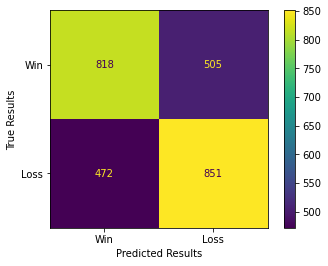

In [22]:
cm=confusion_matrix(final['win'],fy)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Win','Loss'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted Results', ylabel='True Results')